In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn 
import scipy

In [21]:
df=pd.read_csv('Logistic-Regression-data-2-class-v0.csv')
X=df[['x1','x2']]
Y=df['yclass']
X1 = df.drop('x2', axis=1)
X2 = df.drop('x1', axis=1)

# X_1=df.drop(['x2'],axis=1)
# X_2=df.drop(['x1'],axis=1)

X_1_0 = X1[X1['yclass'] == 0]
X_1_1 = X1[X1['yclass'] == 1]
X_2_0 = X2[X2['yclass'] == 0]
X_2_1 = X2[X2['yclass'] == 1]


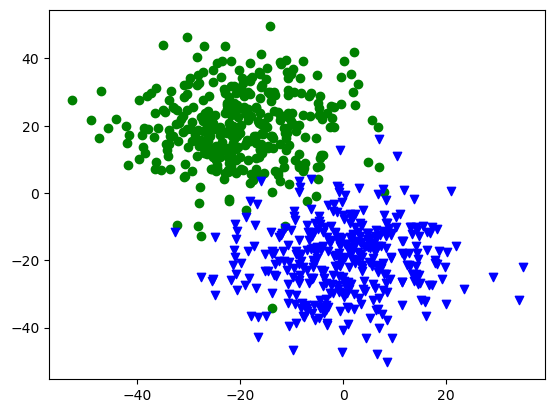

In [22]:
plt.scatter(X_1_0['x1'], X_2_0['x2'], label='Class 1', c='Green', marker='o')
plt.scatter(X_1_1['x1'], X_2_1['x2'], label='Class 2', c='Blue', marker='v')

In [23]:
#The above is the plot in which the values of X when y is 0 and 1 from both the features are grouped under one 
#colour and are plotted,in short the Green coloured dots represents the points from features x1 and x2 which are 
#having y=0 and Blue shows for y=1
#As we can see that there exists a decision boundary,which is approximately a line here having a positive slope and passing in between 
#the two plots.
#The observations from the features having y==0 is more concentrated  at the negative part on the vertical axis,whereas the observations #having y==1 are nearly equally concentrated in both the positive and the negative parts around 0


In [24]:
#Training the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
logist_regr_model = lm.LogisticRegression()
logist_regr_model.fit(X, Y)


LogisticRegression()

In [25]:
pred = logist_regr_model.predict(X)
logist_regr_model.score(X, Y)

0.9763888888888889

In [26]:
predictions = logist_regr_model.predict(X)
# predictions_list = list(predictions_tuple)
# predictions = pd.DataFrame(predictions_list, columns=['y_predicted'])
X2_T = X2['x2'].transpose()

In [27]:
df['predictions'] = predictions
df['wrong_classification'] = (df['yclass'] != df['predictions']).astype(int)

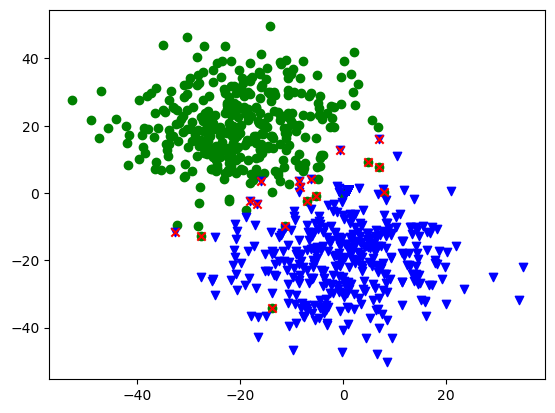

In [28]:
# plt.scatter( X1_T,predictions, label='Class 3', c='Red', marker='x')
# plt.scatter(X2_T,predictions,label='Class 4',c='Blue',marker='o')
plt.scatter(X_1_0, X_2_0, label='Class 0', c='Green', marker='o')
plt.scatter(X_1_1, X_2_1, label='Class 1', c='Blue', marker='v')
wrongly_classified = df[df['wrong_classification'] == 1]
plt.scatter(wrongly_classified['x1'], wrongly_classified['x2'], label='Misclassified', c='Red', marker='x')

In [29]:
#After considering the number of Data set in the model and also the number of points which were correctly classified by the model,
#I really feel that the given model is actually a good one
#The number of points which are wrongly plotted in comparatively very small

In [30]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y, predictions)
confusion

array([[352,   8],
       [  9, 351]], dtype=int64)

In [31]:
#From the confusion Matrix it is clear that the no of points which is wrongly plotted by the model is 17,as compared to 720 observations!

In [32]:
#Now we are going  to calculate the various parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

precision = precision_score(Y, predictions)
recall = recall_score(Y, predictions)
f1 = f1_score(Y, predictions)

fpr, tpr, _ = roc_curve(Y, predictions)
roc_auc = auc(fpr, tpr)

print(f"Precision: {precision:.4f} ")
print(f"Recall: {recall:.4f} ")
print(f"F1 Score: {f1:.4f} ")
print(f"True Positive Rate (TPR): {tpr[1]:.4f} ")
print(f"False Positive Rate (FPR): {fpr[1]:.4f} ")
print(f"ROC AUC: {roc_auc:.4f} ")

Precision: 0.9777 
Recall: 0.9750 
F1 Score: 0.9764 
True Positive Rate (TPR): 0.9750 
False Positive Rate (FPR): 0.0222 
ROC AUC: 0.9764 


The value obtained in precision is great as it is able to make 97.77 percentage of its predicted y==1 to be correct

Recall is also great since the model is able to correctly predict the values where y==1 with 97.50 percent accuracy

The F1 score is also amazing as in ideal case the F-score should have been 1,and in the above model we have obtained a F1 score of 
0.9764

The values of True Positive rate is very near to 1 and that of False positive rate is very near to 0,making this model impressive,and the model is good enough to predict the values for other input x!


In [33]:
# Use the trained model to predict probabilities for class 1
probs = logist_regr_model.predict_proba(X)[:, 1]


In [34]:
tpr_arr=[]
fpr_arr=[]

for threshold in np.arange(0, 1.1, 0.1):
    # Classify observations based on the threshold
    predicted_class = (probs > threshold).astype(int)
    # print(predicted_class)

    # Calculate confusion matrix
    confusion = confusion_matrix(Y, predicted_class)

    # Check if there are any predicted samples for both classes
    if np.sum(predicted_class) > 0 and np.sum(predicted_class == 0) > 0:
        # Calculate Precision, Recall, and F1 Score
        precision = precision_score(Y, predicted_class)
        recall = recall_score(Y, predicted_class)
        f1 = f1_score(Y, predicted_class)
        
    fpr, tpr, _ = roc_curve(Y, predicted_class)
    roc_auc = auc(fpr, tpr)
    tpr_arr.append(tpr[1])  
    fpr_arr.append(fpr[1])
    
    
    labels = ['Actual Negative', 'Actual Positive']
    tn, fp, fn, tp = confusion.ravel()
    custom_confusion = pd.DataFrame({'Predicted Negative': [tn, fn],'Predicted Positive': [fp, tp]},index=labels)
    
    print(f"Threshold Probability: {threshold:.1f}")
    print("Confusion Matrix:")
    print("")
    print(custom_confusion)
    print("")
    print(f"Precision: {precision:.4f} ")
    print(f"Recall: {recall:.4f} ")
    print(f"F1 Score: {f1:.4f} ")
    print(f"True Positive Rate (TPR): {tpr[1]:.4f} ")
    print(f"False Positive Rate (FPR): {fpr[1]:.4f} ")
    # print(f"ROC AUC: {roc_auc:.4f} ")
    
    

Threshold Probability: 0.0
Confusion Matrix:

                 Predicted Negative  Predicted Positive
Actual Negative                   0                 360
Actual Positive                   0                 360

Precision: 0.9777 
Recall: 0.9750 
F1 Score: 0.9764 
True Positive Rate (TPR): 1.0000 
False Positive Rate (FPR): 1.0000 
Threshold Probability: 0.1
Confusion Matrix:

                 Predicted Negative  Predicted Positive
Actual Negative                 332                  28
Actual Positive                   0                 360

Precision: 0.9278 
Recall: 1.0000 
F1 Score: 0.9626 
True Positive Rate (TPR): 1.0000 
False Positive Rate (FPR): 0.0778 
Threshold Probability: 0.2
Confusion Matrix:

                 Predicted Negative  Predicted Positive
Actual Negative                 343                  17
Actual Positive                   3                 357

Precision: 0.9545 
Recall: 0.9917 
F1 Score: 0.9728 
True Positive Rate (TPR): 0.9917 
False Positive Rate (FPR

Text(0, 0.5, 'True Positive Rate (TPR)')

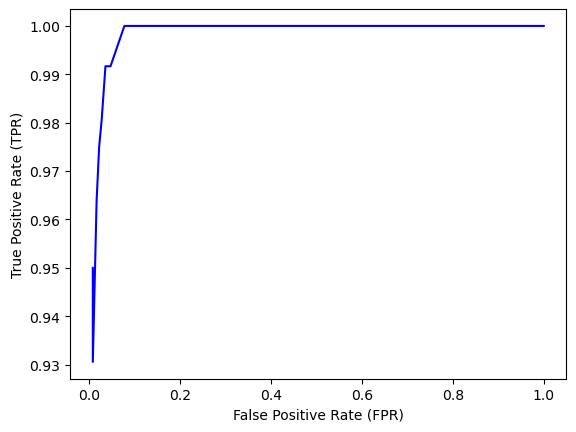

In [35]:
sorted_indices = np.argsort(fpr_arr)
fpr_values = [fpr_arr[i] for i in sorted_indices]
tpr_values = [tpr_arr[i] for i in sorted_indices]
plt.plot(fpr_values, tpr_values, color='blue', label='ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

In [36]:

#The graph has obtained its form because the fpr is very much small as compared to 0.01 and thus are clustered in between 0.05 and 0,thus 
#giving the graph the above shape, and then all of a sudden the value of fpr jumps to 1.

#In case of the tpr,we are having most of the values plotted are in the range of 0.9 to 1.0 and thus we can easily see that in the graph,
#the starting value is itself 0.93 and then it steeply increases to 1

#The above curve is an approximation made because we are having only 11 discrete values of both the fpr and tpr to calculate and thus 
#I have also included the scatter plot of the graph below which provides us with far more greater visualising power!
#In short,the model is nothing short of amazing!

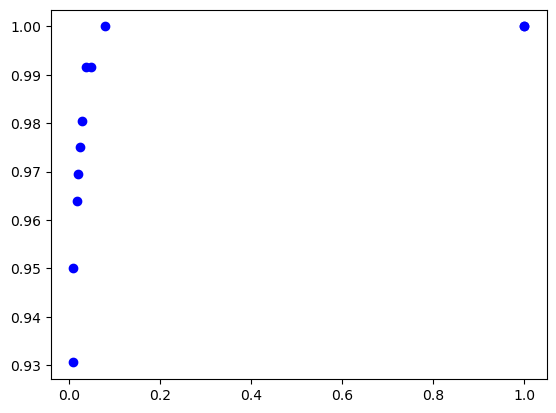

In [37]:
plt.scatter(fpr_arr, tpr_arr, color='blue', label='ROC curve')

In [38]:

roc_auc = auc(fpr_values, tpr_values)
print(fpr_values)
print("")
print(tpr_values)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

[0.008333333333333333, 0.008333333333333333, 0.016666666666666666, 0.019444444444444445, 0.022222222222222223, 0.027777777777777776, 0.03611111111111111, 0.04722222222222222, 0.07777777777777778, 1.0, 1.0]

[0.95, 0.9305555555555556, 0.9638888888888889, 0.9694444444444444, 0.975, 0.9805555555555555, 0.9916666666666667, 0.9916666666666667, 1.0, 1.0, 1.0]
AUC (Area Under the ROC Curve): 0.9906


The value of AUC is 0.9906,which is quite satisfactory as it is close to one because in the ideal case the value is expected to be 1.
Thus,we can easily conclude that the given Logistics model is excellent in classifying the data